In [ ]:
### Author: Michael Ruston
### Date: 4/20/22
### Springboard Assignment: "Craft a story from a dataset"
### Dataset taken from kaggle.com
### dataset URL:
### https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
###


In [1]:
### Start by loading packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
### Now load the dataset:

df = pd.read_csv('adult.csv')


In [3]:
### Initial look at the dataframe just imported:

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.shape

(48842, 15)

In [5]:
### I notice that income is not a continuous variable, but rather a binary variable.

df.income.value_counts(normalize=True)


<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [7]:
### OK, so we have over 48k rows of people
### about 76% have an income under $50K, and about 24% have an income > $50k.
### Next let's look at the other columns, starting from the left.

df.age.value_counts() ### 74 different ages represented!


36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

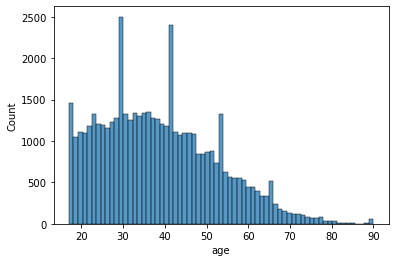

In [10]:
sns.histplot( df.age )  ### Interesting looking plot, we have some spikes. Could be due to binning.


<AxesSubplot:xlabel='age', ylabel='Count'>

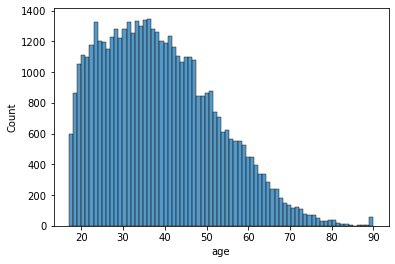

In [11]:
sns.histplot( df.age, bins=74)  ### OK, now there aren't spikes. Spikes probably due to bin sizes.

In [12]:
### Moving on for now, will come back to age later to put into decade bins.

df['workclass'].value_counts()

### We have mostly 'Private' as the workclass
### Some self-employed, some in government, and about 2800 missing values.

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

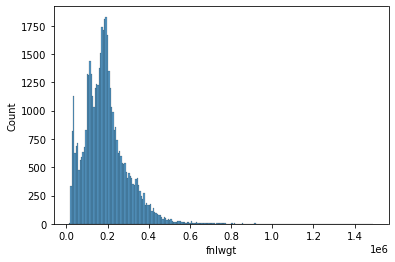

In [13]:
### Now looking at the next column: 'fnlwgt'

sns.histplot(  df['fnlwgt'] )

### Not really sure what this column is used for, skipping it for now.


In [14]:
### Now looking at the education column:

df['education'].value_counts()


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [15]:
### Most common values are 'HS-grad' and 'Some-college'

df['educational-num'].value_counts()
### 16 educational numbers ranging from 1 "Preschool", to 16 "Doctorate"


9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [25]:
### Let's look at the income column conditioned on the educational-num column.

df.groupby('educational-num')['income'].value_counts(normalize=True)

### Ok, now to plot this:
temp = df.groupby('educational-num')['income'].value_counts(normalize=True)
temp

educational-num  income
1                <=50K     0.987952
                 >50K      0.012048
2                <=50K     0.967611
                 >50K      0.032389
3                <=50K     0.946955
                 >50K      0.053045
4                <=50K     0.935079
                 >50K      0.064921
5                <=50K     0.945767
                 >50K      0.054233
6                <=50K     0.937365
                 >50K      0.062635
7                <=50K     0.949227
                 >50K      0.050773
8                <=50K     0.926941
                 >50K      0.073059
9                <=50K     0.841422
                 >50K      0.158578
10               <=50K     0.810351
                 >50K      0.189649
11               <=50K     0.746725
                 >50K      0.253275
12               <=50K     0.742036
                 >50K      0.257964
13               <=50K     0.587165
                 >50K      0.412835
14               >50K      0.549116
    

In [26]:
temp.head()

educational-num  income
1                <=50K     0.987952
                 >50K      0.012048
2                <=50K     0.967611
                 >50K      0.032389
3                <=50K     0.946955
Name: income, dtype: float64

In [31]:
temp.index

temp[(1,'<=50K')]
temp[(2,'<=50K')]
temp[(3,'>50K')]


0.05304518664047151

Text(0.5, 1.0, 'Percentage over $50K income, by Educational attainment')

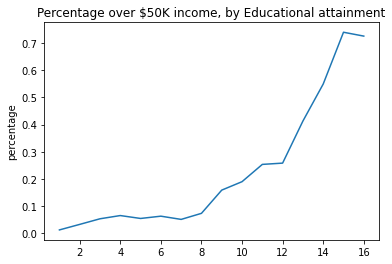

In [64]:
### temp[:]['>50K']

temp[:]
temp2 = pd.DataFrame(temp)

temp2 = temp2.rename(columns={'income':'percentage'})

temp2 = temp2.reset_index()

temp2[temp2.income == '>50K']['percentage']

sns.lineplot(x=range(1,17), y=temp2[temp2.income == '>50K']['percentage'] ).set_title('Percentage over $50K income, by Educational attainment')


In [66]:

df['marital-status'].value_counts()



Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [67]:
df.groupby('marital-status')['income'].value_counts(normalize=True)

marital-status         income
Divorced               <=50K     0.898839
                       >50K      0.101161
Married-AF-spouse      <=50K     0.621622
                       >50K      0.378378
Married-civ-spouse     <=50K     0.553867
                       >50K      0.446133
Married-spouse-absent  <=50K     0.907643
                       >50K      0.092357
Never-married          <=50K     0.954520
                       >50K      0.045480
Separated              <=50K     0.935294
                       >50K      0.064706
Widowed                <=50K     0.915679
                       >50K      0.084321
Name: income, dtype: float64

In [78]:
temp = df.groupby('marital-status')['income'].value_counts(normalize=True)

temp = pd.DataFrame(temp)

temp = temp.rename(columns={'income':'percent'})

temp = temp.reset_index()

temp[ (temp.income == '>50K') & (temp['marital-status'].isin(['Never-married','Married-civ-spouse','Divorced'])) ]


,marital-status,income,percent
1,Divorced,>50K,0.101161
5,Married-civ-spouse,>50K,0.446133
9,Never-married,>50K,0.045480


In [ ]:
### Quite a take-away here!
### Top three values of the marital-status category are shown above.
### Those in the 'Married-civ-spouse' category earn over $50K about 44.6% of the time.
### Divorced individuals only earn over $50k about 10.1% of the time.
### Only 4.5% of 'Never-married' individuals earn over $50k.
### This is probably partially a proxy variable for age, with older people earning more, on average.


In [79]:
df['occupation'].value_counts()
### Not that many unique values of 'occupation', as seen below


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [80]:
df.groupby('occupation')['income'].value_counts(normalize=True)

occupation         income
?                  <=50K     0.905660
                   >50K      0.094340
Adm-clerical       <=50K     0.863126
                   >50K      0.136874
Armed-Forces       <=50K     0.666667
                   >50K      0.333333
Craft-repair       <=50K     0.773724
                   >50K      0.226276
Exec-managerial    <=50K     0.522182
                   >50K      0.477818
Farming-fishing    <=50K     0.883893
                   >50K      0.116107
Handlers-cleaners  <=50K     0.933398
                   >50K      0.066602
Machine-op-inspct  <=50K     0.876903
                   >50K      0.123097
Other-service      <=50K     0.958562
                   >50K      0.041438
Priv-house-serv    <=50K     0.987603
                   >50K      0.012397
Prof-specialty     <=50K     0.548931
                   >50K      0.451069
Protective-serv    <=50K     0.686673
                   >50K      0.313327
Sales              <=50K     0.732013
                   >50K 

In [99]:
temp = df.groupby('occupation')['income'].value_counts(normalize=True)

temp = pd.DataFrame(temp)

temp.rename(columns={'income':'percentage'}, inplace=True)

temp = temp.reset_index()

temp3 = temp[temp.income == '>50K']

temp3 = temp3[['occupation','percentage' ]]

temp3

,occupation,percentage
1,?,0.094340
3,Adm-clerical,0.136874
5,Armed-Forces,0.333333
7,Craft-repair,0.226276
9,Exec-managerial,0.477818
11,Farming-fishing,0.116107
13,Handlers-cleaners,0.066602
15,Machine-op-inspct,0.123097
17,Other-service,0.041438
19,Priv-house-serv,0.012397


In [95]:
temp2 = df['occupation'].value_counts()

temp2 = pd.DataFrame(temp2).reset_index()

temp2.rename(columns={'index':'occupation','occupation':'count'} , inplace=True )

temp2


,occupation,count
0,Prof-specialty,6172
1,Craft-repair,6112
2,Exec-managerial,6086
3,Adm-clerical,5611
4,Sales,5504
5,Other-service,4923
6,Machine-op-inspct,3022
7,?,2809
8,Transport-moving,2355
9,Handlers-cleaners,2072


In [107]:

t4 = pd.merge( temp2, temp3)

t4.rename( columns={'percentage':'%_over_50K'}, inplace=True  )

t4

,occupation,count,%_over_50K
0,Prof-specialty,6172,0.451069
1,Craft-repair,6112,0.226276
2,Exec-managerial,6086,0.477818
3,Adm-clerical,5611,0.136874
4,Sales,5504,0.267987
5,Other-service,4923,0.041438
6,Machine-op-inspct,3022,0.123097
7,?,2809,0.094340
8,Transport-moving,2355,0.204246
9,Handlers-cleaners,2072,0.066602


Take-aways from this dataframe, summarizing income by occupation:

The most common occupation in this dataset is 'Prof-specialty', and 45% of this occupation makes over $50k.
The next most common occupation is 'Craft-repair' and 22.6% of this occupation makes over $50k.





In [108]:
df['relationship'].value_counts() ### Going to skip this column for now.

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [109]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [110]:
df.groupby('race')['income'].value_counts(normalize=True)

race                income
Amer-Indian-Eskimo  <=50K     0.882979
                    >50K      0.117021
Asian-Pac-Islander  <=50K     0.730744
                    >50K      0.269256
Black               <=50K     0.879189
                    >50K      0.120811
Other               <=50K     0.876847
                    >50K      0.123153
White               <=50K     0.746013
                    >50K      0.253987
Name: income, dtype: float64

In [111]:
df.groupby('gender')['income'].value_counts(normalize=True)

gender  income
Female  <=50K     0.890749
        >50K      0.109251
Male    <=50K     0.696233
        >50K      0.303767
Name: income, dtype: float64

In [112]:
df.groupby(['race','gender'])['income'].value_counts(normalize=True)

race                gender  income
Amer-Indian-Eskimo  Female  <=50K     0.918919
                            >50K      0.081081
                    Male    <=50K     0.859649
                            >50K      0.140351
Asian-Pac-Islander  Female  <=50K     0.866538
                            >50K      0.133462
                    Male    <=50K     0.660679
                            >50K      0.339321
Black               Female  <=50K     0.942808
                            >50K      0.057192
                    Male    <=50K     0.817417
                            >50K      0.182583
Other               Female  <=50K     0.929032
                            >50K      0.070968
                    Male    <=50K     0.844622
                            >50K      0.155378
White               Female  <=50K     0.881630
                            >50K      0.118370
                    Male    <=50K     0.684531
                            >50K      0.315469
Name: income, dtype: floa

In [118]:
df.head()

def afunc(mylist):
    return sum(mylist == '>50K') / len(mylist)


table = pd.pivot_table(df, values='income', index=['race'], columns=['gender'], aggfunc=afunc)

table


gender,Female,Male
race,,
Amer-Indian-Eskimo,0.081081,0.140351
Asian-Pac-Islander,0.133462,0.339321
Black,0.057192,0.182583
Other,0.070968,0.155378
White,0.118370,0.315469



The Males:
31.5% of White Males have income over $50K
18.3% of Black Males have income over $50K
33.9% of Asian/Pacific Islander Males have income over $50K
14.0% of American Indian/Eskimo Males have income over $50K
15.5% of 'Other' Males have income over $50K

The Females:
11.8% of White Females have income over $50K
 5.7% of Black Females have income over $50K
13.3% of Asian/Pacific Islander Females have income over $50K
 8.1% of American Indian/Eskimo Females have income over $50K
 7.1% of 'Other' Females have income over $50K




In [119]:
pd.pivot_table(df, values='income', index=['race'], columns=['gender'], aggfunc=len )


gender,Female,Male
race,,
Amer-Indian-Eskimo,185,285
Asian-Pac-Islander,517,1002
Black,2308,2377
Other,155,251
White,13027,28735


In [122]:
df['native-country'].value_counts()

df['US-native'] = df['native-country'] == 'United-States'

df['US-native'].value_counts()


True     43832
False     5010
Name: US-native, dtype: int64

In [123]:
df.groupby('US-native')['income'].value_counts(normalize=True)

US-native  income
False      <=50K     0.801796
           >50K      0.198204
True       <=50K     0.756023
           >50K      0.243977
Name: income, dtype: float64

In [ ]:
### 24.4% of US native-born people make over $50K
### 19.8% of non native-born people make over $50K


<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

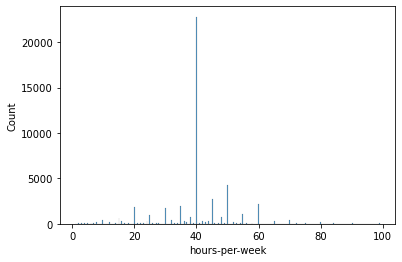

In [130]:
df['hours-per-week'].value_counts()

sns.histplot( data=df['hours-per-week'] )

In [133]:
df['hours-per-week'].value_counts().head(10)

40    22803
50     4246
45     2717
60     2177
35     1937
20     1862
30     1700
55     1051
25      958
48      770
Name: hours-per-week, dtype: int64

In [141]:
df['OverUnder'] = '40'

df.loc[df['hours-per-week'] < 40 , 'OverUnder'] = 'Under40'
df.loc[df['hours-per-week'] > 40 , 'OverUnder'] = 'Over40'

df.OverUnder.value_counts()


40         22803
Over40     14352
Under40    11687
Name: OverUnder, dtype: int64

In [142]:
df.groupby('OverUnder')['income'].value_counts(normalize=True)

OverUnder  income
40         <=50K     0.787309
           >50K      0.212691
Over40     <=50K     0.599916
           >50K      0.400084
Under40    <=50K     0.906306
           >50K      0.093694
Name: income, dtype: float64

In [ ]:
### Hours worked does seem to matter!
### 21.2% of those working 40 hours per week earn over $50K
###  9.3% of those working under 40 hours per week earn over $50K
### 40.0% of those working over 40 hours per week earn over $50K


In [149]:
df['hours-per-week'].value_counts().head(15)

HoursList = df['hours-per-week'].value_counts().head(15).index

print(HoursList)

df['hpw'] = df['hours-per-week']

df.loc[ ~df['hours-per-week'].isin(HoursList) , 'hpw' ] = 'Other'

df['hpw'].value_counts()


Int64Index([40, 50, 45, 60, 35, 20, 30, 55, 25, 48, 38, 15, 70, 10, 32], dtype='int64')


40       22803
Other     5999
50        4246
45        2717
60        2177
35        1937
20        1862
30        1700
55        1051
25         958
48         770
38         714
15         623
70         437
10         425
32         423
Name: hpw, dtype: int64

In [155]:
tmp = df.groupby('hpw')['income'].value_counts(normalize=True)

tmp = pd.DataFrame(tmp).rename(columns={'income':'%_over_$50K'})

tmp = tmp.reset_index()

tmp2 = tmp.loc[tmp.income == '>50K',:]

tmp2

,hpw,income,%_over_$50K
1,10,>50K,0.077647
3,15,>50K,0.048154
5,20,>50K,0.060150
7,25,>50K,0.051148
9,30,>50K,0.068235
11,32,>50K,0.101655
13,35,>50K,0.146618
15,38,>50K,0.182073
17,40,>50K,0.212691
19,45,>50K,0.370629


Text(0.5, 1.0, '% over $50K Income by Hours worked per Week')

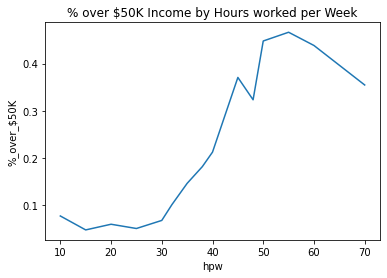

In [158]:
data = tmp2.loc[tmp2.hpw.isin(HoursList),]

sns.lineplot(x='hpw', y='%_over_$50K', data=data).set_title('% over $50K Income by Hours worked per Week')


Take-away from the above line plot:

Those working up to 30 hours per week have a lower than 10\% chance of making over \\$50K per year.

Between 30 and 50 hours per week, the chances of making over \\$50K per year increase as hours worked increases.

Those working 40 hours per week (the majority of people) have a 21.3\% chance of making over \\$50K

Those working 50 hours per week have a 44.8\% chance of making over \\$50K

Those working 55 hours per week have a 46.6\% chance of making over \\$50K



In [162]:
### Now returning back to the age variable...

df['AgeGroup'] = pd.cut( df.age, bins=[0,19,29,39,49,59,69,100], labels=['Under20','20s','30s','40s','50s','60s','70+'] )

df['AgeGroup'].value_counts()


30s        12929
20s        12005
40s        10724
50s         6619
60s         3054
Under20     2510
70+         1001
Name: AgeGroup, dtype: int64

In [163]:
df.groupby('AgeGroup')['income'].value_counts(normalize=True)

AgeGroup  income
Under20   <=50K     0.998805
          >50K      0.001195
20s       <=50K     0.938109
          >50K      0.061891
30s       <=50K     0.732307
          >50K      0.267693
40s       <=50K     0.628310
          >50K      0.371690
50s       <=50K     0.620940
          >50K      0.379060
60s       <=50K     0.735102
          >50K      0.264898
70+       <=50K     0.824176
          >50K      0.175824
Name: income, dtype: float64

# Take-aways of income by Age Group:


Just 0.1\% of those under 20 years old make over \\$50K

6.2\% of people in their 20s make over \\$50K

26.8\% of people in their 30s make over \\$50K

37.2\% of people in their 40s make over \\$50K

37.9\% of people in their 50s make over \\$50K

26.5\% of people in their 60s make over \\$50K

17.6\% of people 70+ make over \\$50K

